In [1]:
import os,sys,inspect
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
from utils.ss_to_image import final_crop
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy.signal import find_peaks
import statistics

In [33]:
cropped_image= final_crop('../../resource/screenshots/aritra.jpeg')
img = cropped_image
img_1 = img.copy()

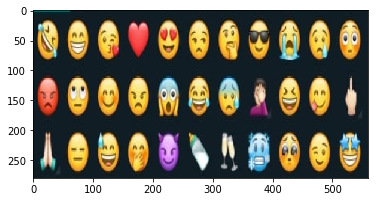

In [34]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [21]:
kernel = np.ones((5,5),np.float32)/25

k = 20

for i in range(k):
    img = cv2.filter2D(img,-1,kernel)

In [22]:
# Row check


peak_len = []
l = np.random.uniform(low=0, high=img.shape[0], size=1000).astype(int)
for i in l:
    pixel_array = img[:,:,2][i]
    peaks, val = find_peaks(pixel_array, height=0)
    peak_len.append(len(peaks))

#print("simulated num of emojis in a row : ", peak_len)
num_emojis_row = statistics.mode(peak_len)

In [23]:
print(num_emojis_row)

8


In [24]:
# Column check
peak_len = []
l = np.random.uniform(low=0, high=img.shape[0]//2, size=1000).astype(int)
for i in l:
    pixel_array = img[:,:,2][:, i]
    peaks, val = find_peaks(pixel_array, height=0)
    peak_len.append(len(peaks))

#print("simulated num of emojis in a col : ", peak_len)
num_emojis_col = statistics.mode(peak_len)

In [25]:
print(num_emojis_col)

4


In [26]:
img.shape

(280, 560, 3)

In [27]:
num_emojis_row, num_emojis_col

(8, 4)

In [28]:
dim = (70*num_emojis_row,70*num_emojis_col)    
img_1 = cv2.resize(img_1, dim, interpolation = cv2.INTER_AREA) 

In [29]:
emoji_list = []
for i in range(num_emojis_col):
    for j in range(num_emojis_row):
        temp = img_1[i*70:(i+1)*70,j*70:(j+1)*70]
        emoji_list.append(temp)
print(len(emoji_list))

32


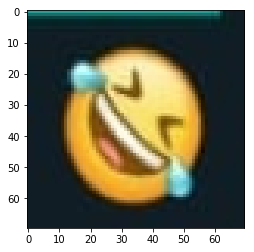

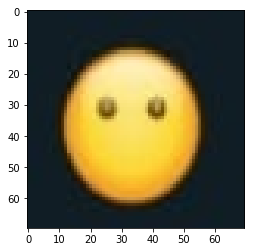

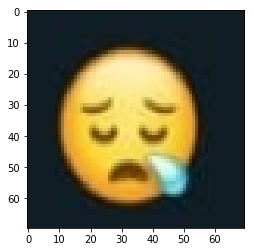

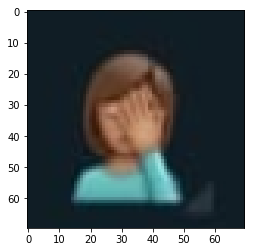

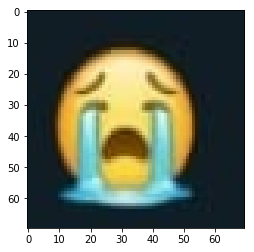

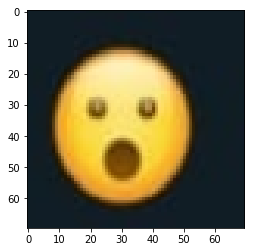

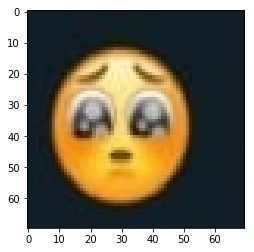

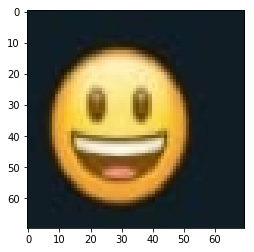

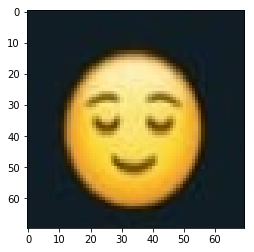

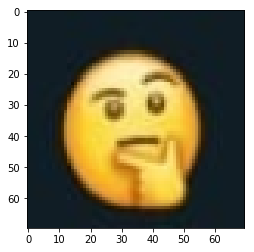

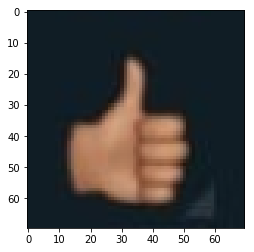

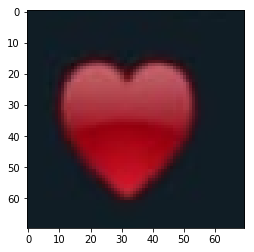

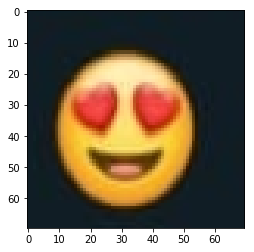

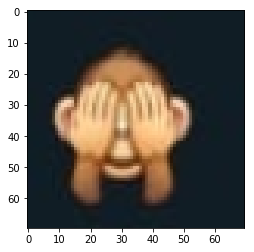

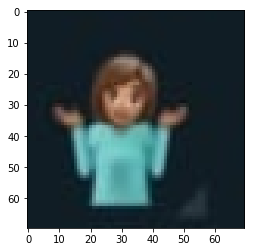

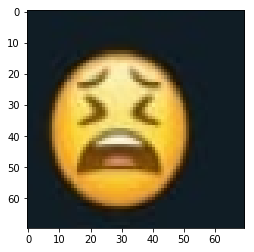

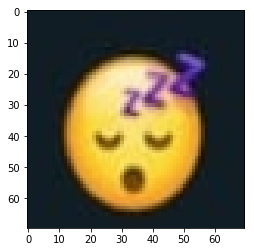

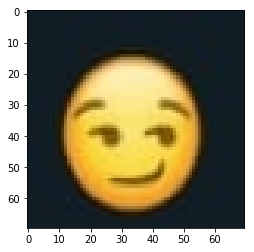

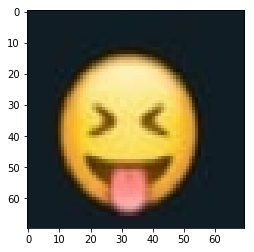

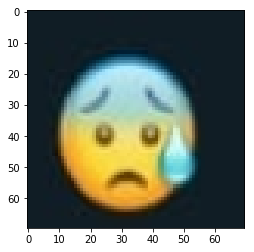

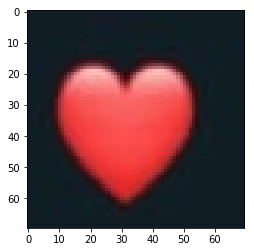

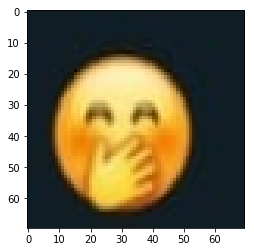

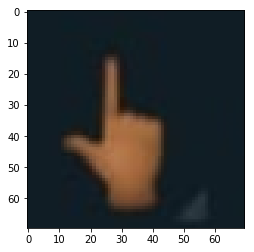

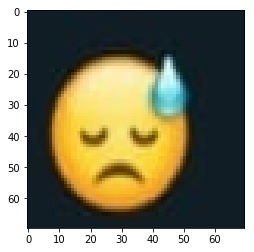

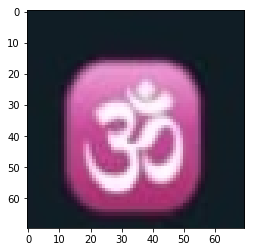

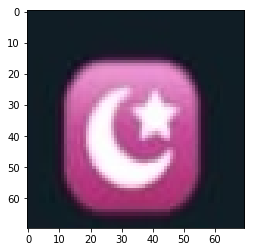

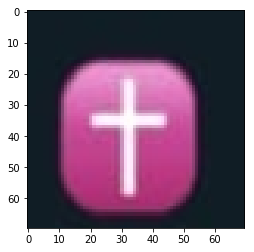

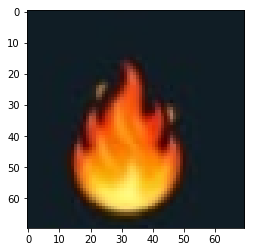

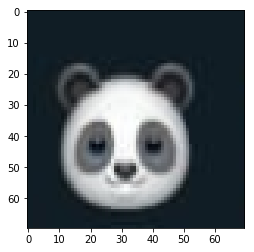

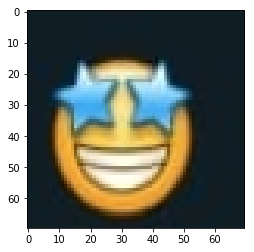

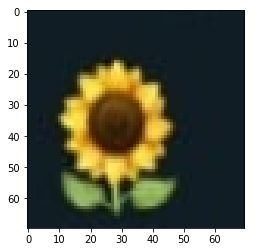

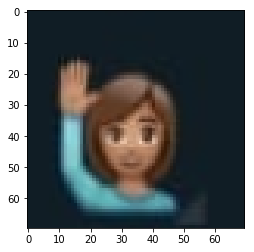

In [30]:
for i in emoji_list:
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
    plt.show()

In [35]:
def image_2_emoji_2(image):
    img_1 = image.copy()
    
    kernel = np.ones((5,5),np.float32)/25
    k = 20
    for i in range(k):
        image = cv2.filter2D(image,-1,kernel)
        
    # Row check
    peak_len = []
    l = np.random.uniform(low=0, high=image.shape[0], size=1000).astype(int)
    for i in l:
        pixel_array = image[:,:,2][i]
        peaks, val = find_peaks(pixel_array, height=0)
        peak_len.append(len(peaks))
    num_emojis_row = statistics.mode(peak_len)
    
    # Column check
    peak_len = []
    l = np.random.uniform(low=0, high=image.shape[0]//2, size=1000).astype(int)
    for i in l:
        pixel_array = image[:,:,2][:, i]
        peaks, val = find_peaks(pixel_array, height=0)
        peak_len.append(len(peaks))
    num_emojis_col = statistics.mode(peak_len)
    
    dim = (70*num_emojis_row,70*num_emojis_col)    
    img_1 = cv2.resize(img_1, dim, interpolation = cv2.INTER_AREA) 
    
    emoji_list = []
    for i in range(num_emojis_col):
        for j in range(num_emojis_row):
            temp = img_1[i*70:(i+1)*70,j*70:(j+1)*70]
            emoji_list.append(temp)
    
    return emoji_list

### An example

In [42]:
cropped_image= final_crop('../../resource/screenshots/Anirban.jpeg')
image = cropped_image

In [43]:
l = image_2_emoji_2(image)
print(len(l))

24


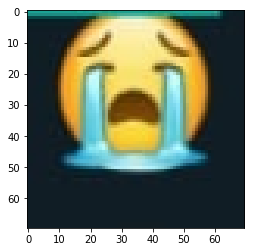

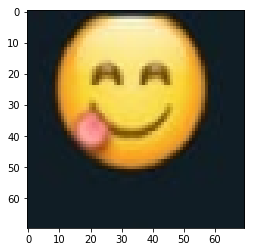

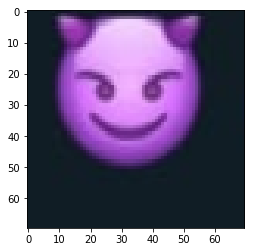

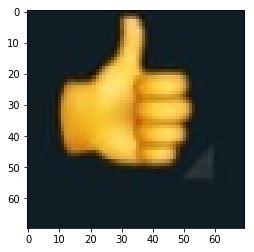

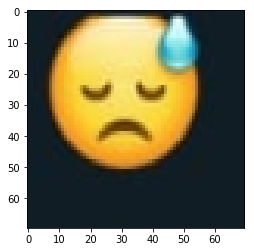

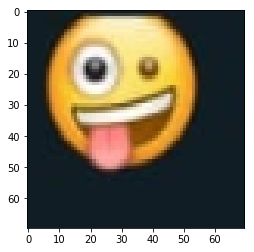

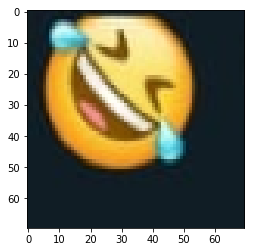

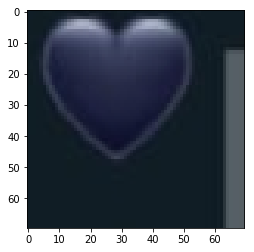

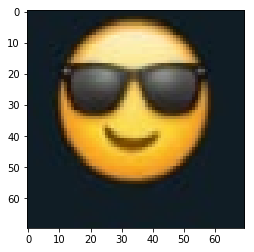

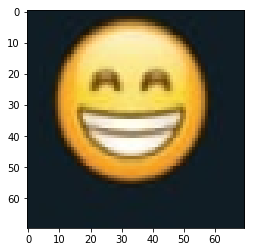

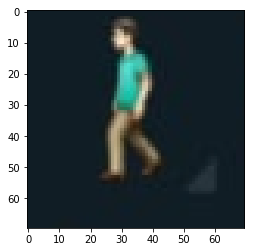

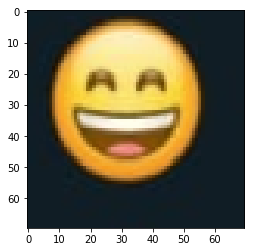

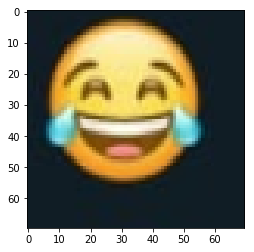

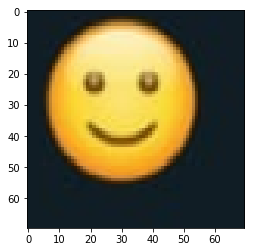

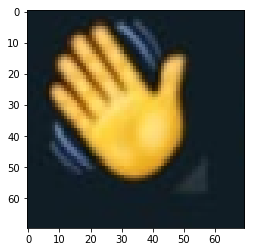

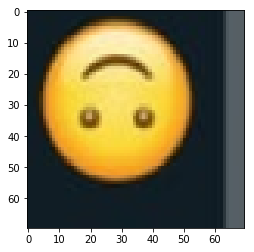

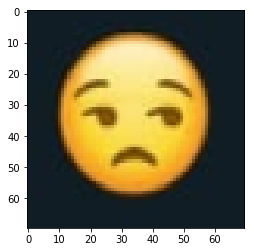

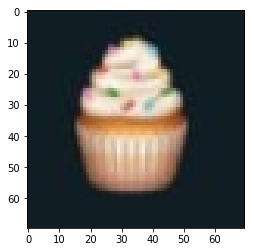

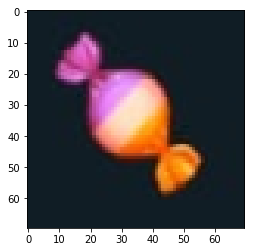

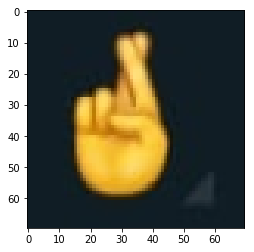

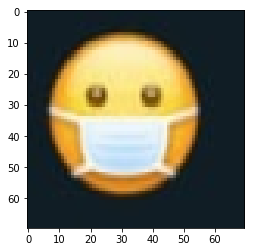

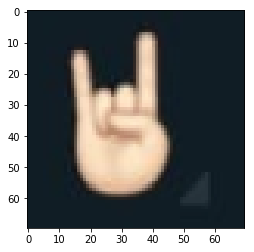

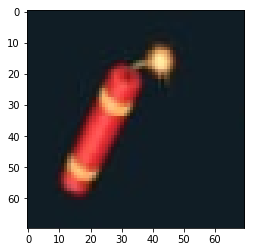

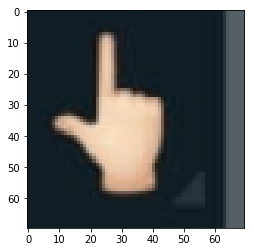

In [44]:
for i in l:
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
    plt.show()